In [1]:
cd ../sentiment-clf/

/Users/akshanshnain/Downloads/project_app/Flask-setup /sentiment-clf


In [11]:
from model import NLPModel
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
model = NLPModel()

In [13]:
with open('lib/data/train.tsv') as f:
    data = pd.read_csv(f, sep='\t')

In [14]:
data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [15]:
pos_neg = data[(data['Sentiment'] == 0) | (data['Sentiment'] == 4)]

In [16]:
pos_neg['Binary'] = pos_neg.apply(
    lambda x: 0 if x['Sentiment'] == 0 else 1, axis=1)

<ipython-input-16-5c30a57ee9fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_neg['Binary'] = pos_neg.apply(


In [17]:
model.vectorizer_fit(pos_neg.loc[:, 'Phrase'])

In [18]:
X = model.vectorizer_transform(pos_neg.loc[:, 'Phrase'])

## Separate the target from the data

In [19]:
y = pos_neg.loc[:, 'Binary']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
model.train(X_train, y_train)

In [22]:
from util import plot_roc

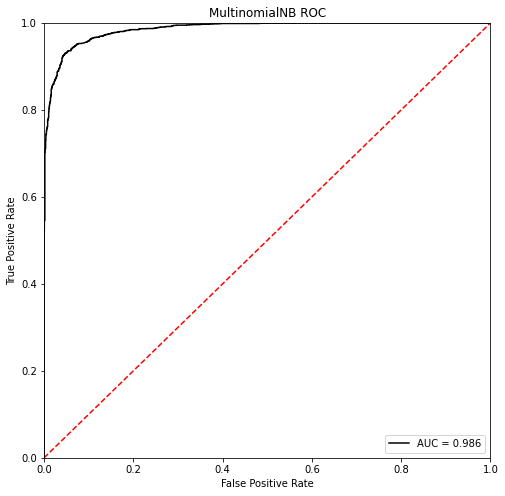

In [23]:
model.plot_roc(X_test, y_test, size_x=8, size_y=8)